<a href="https://colab.research.google.com/github/Musa-Ali-Kazmi/Urdu-Text-Sentiment-Analysis/blob/main/Urdu_Text_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!unzip "/content/drive/MyDrive/DL-Assignment3/imdb_urdu_reviews_test.csv.zip" -d "/content/drive/MyDrive/DL-Assignment3"

Archive:  /content/drive/MyDrive/DL-Assignment3/imdb_urdu_reviews_test.csv.zip
  inflating: /content/drive/MyDrive/DL-Assignment3/imdb_urdu_reviews_test.csv  


In [ ]:
import pandas as pd

In [35]:
# Path to your CSV file
csv_file_path = "/content/drive/MyDrive/DL-Assignment3/imdb_urdu_reviews_test.csv.zip"

# Read the CSV file into a DataFrame
df_urdu = pd.read_csv(csv_file_path)


In [ ]:
!pip install urduhack

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize

89078/89078 [==============================] - 0s 0us/step


In [ ]:
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols

<Axes: xlabel='sentiment', ylabel='count'>

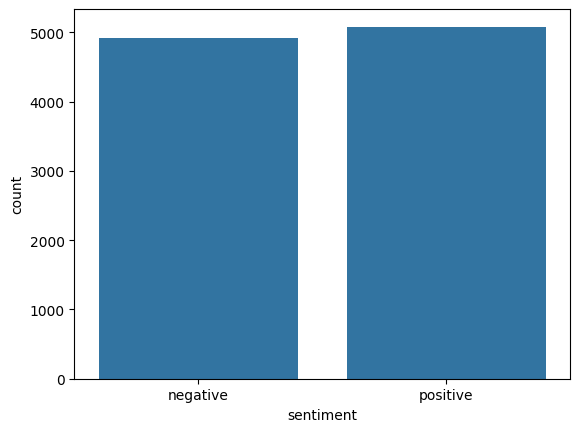

In [36]:
import seaborn as sns
sns.countplot(x = "sentiment", data = df)

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
# encoding the labels
le = LabelEncoder()
le.fit(df_urdu['sentiment'])
df_urdu['encoded_label'] = le.transform(df_urdu['sentiment'])

In [38]:
df_urdu['review'] = df_urdu['review'].apply(normalize)
df_urdu['review'] = df_urdu['review'].apply(remove_accents)
df_urdu['review'] = df_urdu['review'].apply(replace_urls)
df_urdu['review'] = df_urdu['review'].apply(replace_emails)
df_urdu['review'] = df_urdu['review'].apply(replace_currency_symbols)

In [46]:
from typing import FrozenSet
STOP_WORDS: FrozenSet[str] = frozenset("""اب
ابھی
اپنا
اپنے
اپنی
اٹھا
اس
اسے
اسی
اگر
ان
انہوں
انہی
انہیں
انھیں
او
اور
اے
ایسا
ایسے
ایسی
ایک
آ
آپ
آتا
آتے
آتی
آگے
آنا
آنے
آنی
آئے
آئی
آئیں
آیا
با
بڑا
بڑے
بڑی
بعد
بعض
بلکہ
بہت
بھی
بے
پاس
پر
پہلے
پھر
تا
تاکہ
تب
تجھ
تجھے
تک
تم
تمام
تمہارا
تمہارے
تمھارے
تمہاری
تمہیں
تمھیں
تھا
تھے
تھی
تھیں
تو
تیری
تیرے
جا
جاتا
جاتی
جاتے
جاتی
جانے
جانی
جاؤ
جائے
جائیں
جب
جس
جن
جنہوں
جنہیں
جو
جیسا
جیسے
جیسی
جیسوں
چاہیئے
چلا
چاہے
چونکہ
حالاں
حالانکہ
دو
دونوں
دوں
دے
دی
دیا
دیں
دیے
دیتا
دیتے
دیتی
دینا
دینے
دینی
دیئے
ڈالا
ڈالنا
ڈالنے
ڈالنی
ڈالے
ڈالی
ذرا
رکھا
رکھتا
رکھتے
رکھتی
رکھنا
رکھنے
رکھنی
رکھے
رکھی
رہ
رہا
رہتا
رہتے
رہتی
رہنا
رہنے
رہنی
رہو
رہے
رہی
رہیں
زیادہ
سا
سامنے
سب
سکتا
سو
سے
سی
شاید
صرف
طرح
طرف
عین
کا
کبھی
کچھ
کہہ
کر
کرتا
کرتے
کرتی
کرنا
کرنے
کرو
کروں
کرے
کریں
کس
کسے
کسی
کہ
کہا
کہے
کو
کون
کوئی
کے
کی
کیا
کیسے
کیوں
کیونکہ
کیے
کئے
گا
گویا
گے
گی
گیا
گئے
گئی
لا
لاتا
لاتے
لاتی
لانا
لانے
لانی
لایا
لائے
لائی
لگا
لگے
لگی
لگیں
لو
لے
لی
لیا
لیتا
لیتے
لیتی
لیکن
لیں
لیے
لئے
مجھ
مجھے
مگر
میرا
میرے
میری
میں
نا
نہ
نہایت
نہیں
نے
ہاں
ہر
ہم
ہمارا
ہمارے
ہماری
ہو
ہوا
ہوتا
ہوتے
ہوتی
ہوتیں
ہوں
ہونا
ہونگے
ہونے
ہونی
ہوئے
ہوئی
ہوئیں
ہے
ہی
ہیں
و
والا
والوں
والے
والی
وہ
وہاں
وہی
وہیں
یا
یعنی
یہ
یہاں
یہی
یہیں""".split())

def remove_stopwords(text: str):
  return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [47]:
len(STOP_WORDS)

264

In [48]:
df_urdu[["review"]].head(3)

,review
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...


In [49]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
  lemme_str = ""
  temp = lemmatizer.lemma_lookup(str)
  for t in temp:
    lemme_str += t[0] + " "
  return lemme_str

In [50]:
df_urdu['lemmatized_text'] = df_urdu['review'].apply(lemitizeStr)

In [51]:
df_urdu["review"] = df["review"].apply(remove_stopwords)

In [ ]:
df_urdu['review'][1], df_urdu['lemmatized_text'][1]

In [60]:
df_urdu.head(3)

,review,sentiment,lemmatized_text,encoded_label
0,گھر خواتین بارے دستاویزی فلم ہے۔ لحاظ دلچسپ با...,negative,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,0
1,بالکل اچھ ،ی کام ، پوری فلم گرڈج کہیں ترتیب لو...,negative,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,0
2,عجیب بات لوگوں حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسک...,negative,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,0
